# Kaggle Superstore dataset
https://www.kaggle.com/datasets/vivek468/superstore-dataset-final

# Introduction and basic description  <a class="anchor" id="intro"></a>


**With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking our knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.**

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [193]:
df=pd.read_csv("Superstore.csv",error_bad_lines=False, encoding='cp1252')
df=df.set_index('Row ID')

In [194]:
print("dataframe shape info : {}".format(df.shape))

dataframe shape info : (9994, 20)


In [195]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**Row ID** => Unique ID for each row.

**Order ID** => Unique Order ID for each Customer.

**Order Date** => Order Date of the product.

**Ship Date** => Shipping Date of the Product.

**Ship Mode**=> Shipping Mode specified by the Customer.

**Customer ID**=> Unique ID to identify each Customer.

**Customer Name** => Name of the Customer.

**Segment** => The segment where the Customer belongs.

**Country** => Country of residence of the Customer.

**City** => City of residence of of the Customer.

**State** => State of residence of the Customer.

**Postal Code** => Postal Code of every Customer.

**Region** => Region where the Customer belong.

**Product ID** => Unique ID of the Product.

**Category** => Category of the product ordered.

**Sub-Category** => Sub-Category of the product ordered.

**Product Name** => Name of the Product.

**Sales** => Sales of the Product.

**Quantity** => Quantity of the Product.

**Discount** => Discount provided.

**Profit** => Profit/Loss incurred.

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
Order ID         9994 non-null object
Order Date       9994 non-null object
Ship Date        9994 non-null object
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: float64(3), int64(2), object(15)
memory usage: 1.6+ MB


In [197]:
n=df.nunique(axis=0)
print("No.of.unique values in each column :\n",n)

No.of.unique values in each column :
 Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64


In [198]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Cleaning <a class="anchor" id="cleaning"></a>

## Missing values <a class="anchor" id="missing"></a>

In [199]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

**No NA or null values**

## Outliers checking with isolation forest <a class="anchor" id="outliers"></a>

In [200]:
from sklearn.ensemble import IsolationForest


def detect_outliers(dataframe,contamination):
    

    a=list(dataframe.select_dtypes(['int64']).columns)+list(dataframe.select_dtypes(['float64']).columns)
    model=IsolationForest(contamination=contamination)
    model.fit(dataframe[a])
    outliers = model.predict(dataframe[a]) ==-1
    return outliers

**Finding outliers considering 0.5% of contamination**

In [201]:
contamination=0.005
index=detect_outliers(df[['Sales','Quantity','Discount','Profit']],contamination)
lign,col=df[index].shape
print("number of outliers: {}".format(lign))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


number of outliers: 50


In [202]:
df[index].head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
166,CA-2014-139892,9/8/2014,9/12/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
216,CA-2015-146262,1/2/2015,1/9/2015,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,TEC-MA-10000864,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,1188.000,9,0.7,-950.4000
252,CA-2016-145625,9/11/2016,9/17/2016,Standard Class,KC-16540,Kelly Collister,Consumer,United States,San Diego,California,92037,West,TEC-AC-10003832,Technology,Accessories,Logitech P710e Mobile Speakerphone,3347.370,13,0.0,636.0003
319,CA-2014-164973,11/4/2014,11/9/2014,Standard Class,NM-18445,Nathan Mautz,Home Office,United States,New York City,New York,10024,East,TEC-MA-10002927,Technology,Machines,Canon imageCLASS MF7460 Monochrome Digital Las...,3991.980,2,0.0,1995.9900


**filtering ->**

In [203]:
df=df[index==False]

# Data visualization<a class="anchor" id="eda"></a>

## Feature Count Plot <a class="anchor" id="repartition"></a>

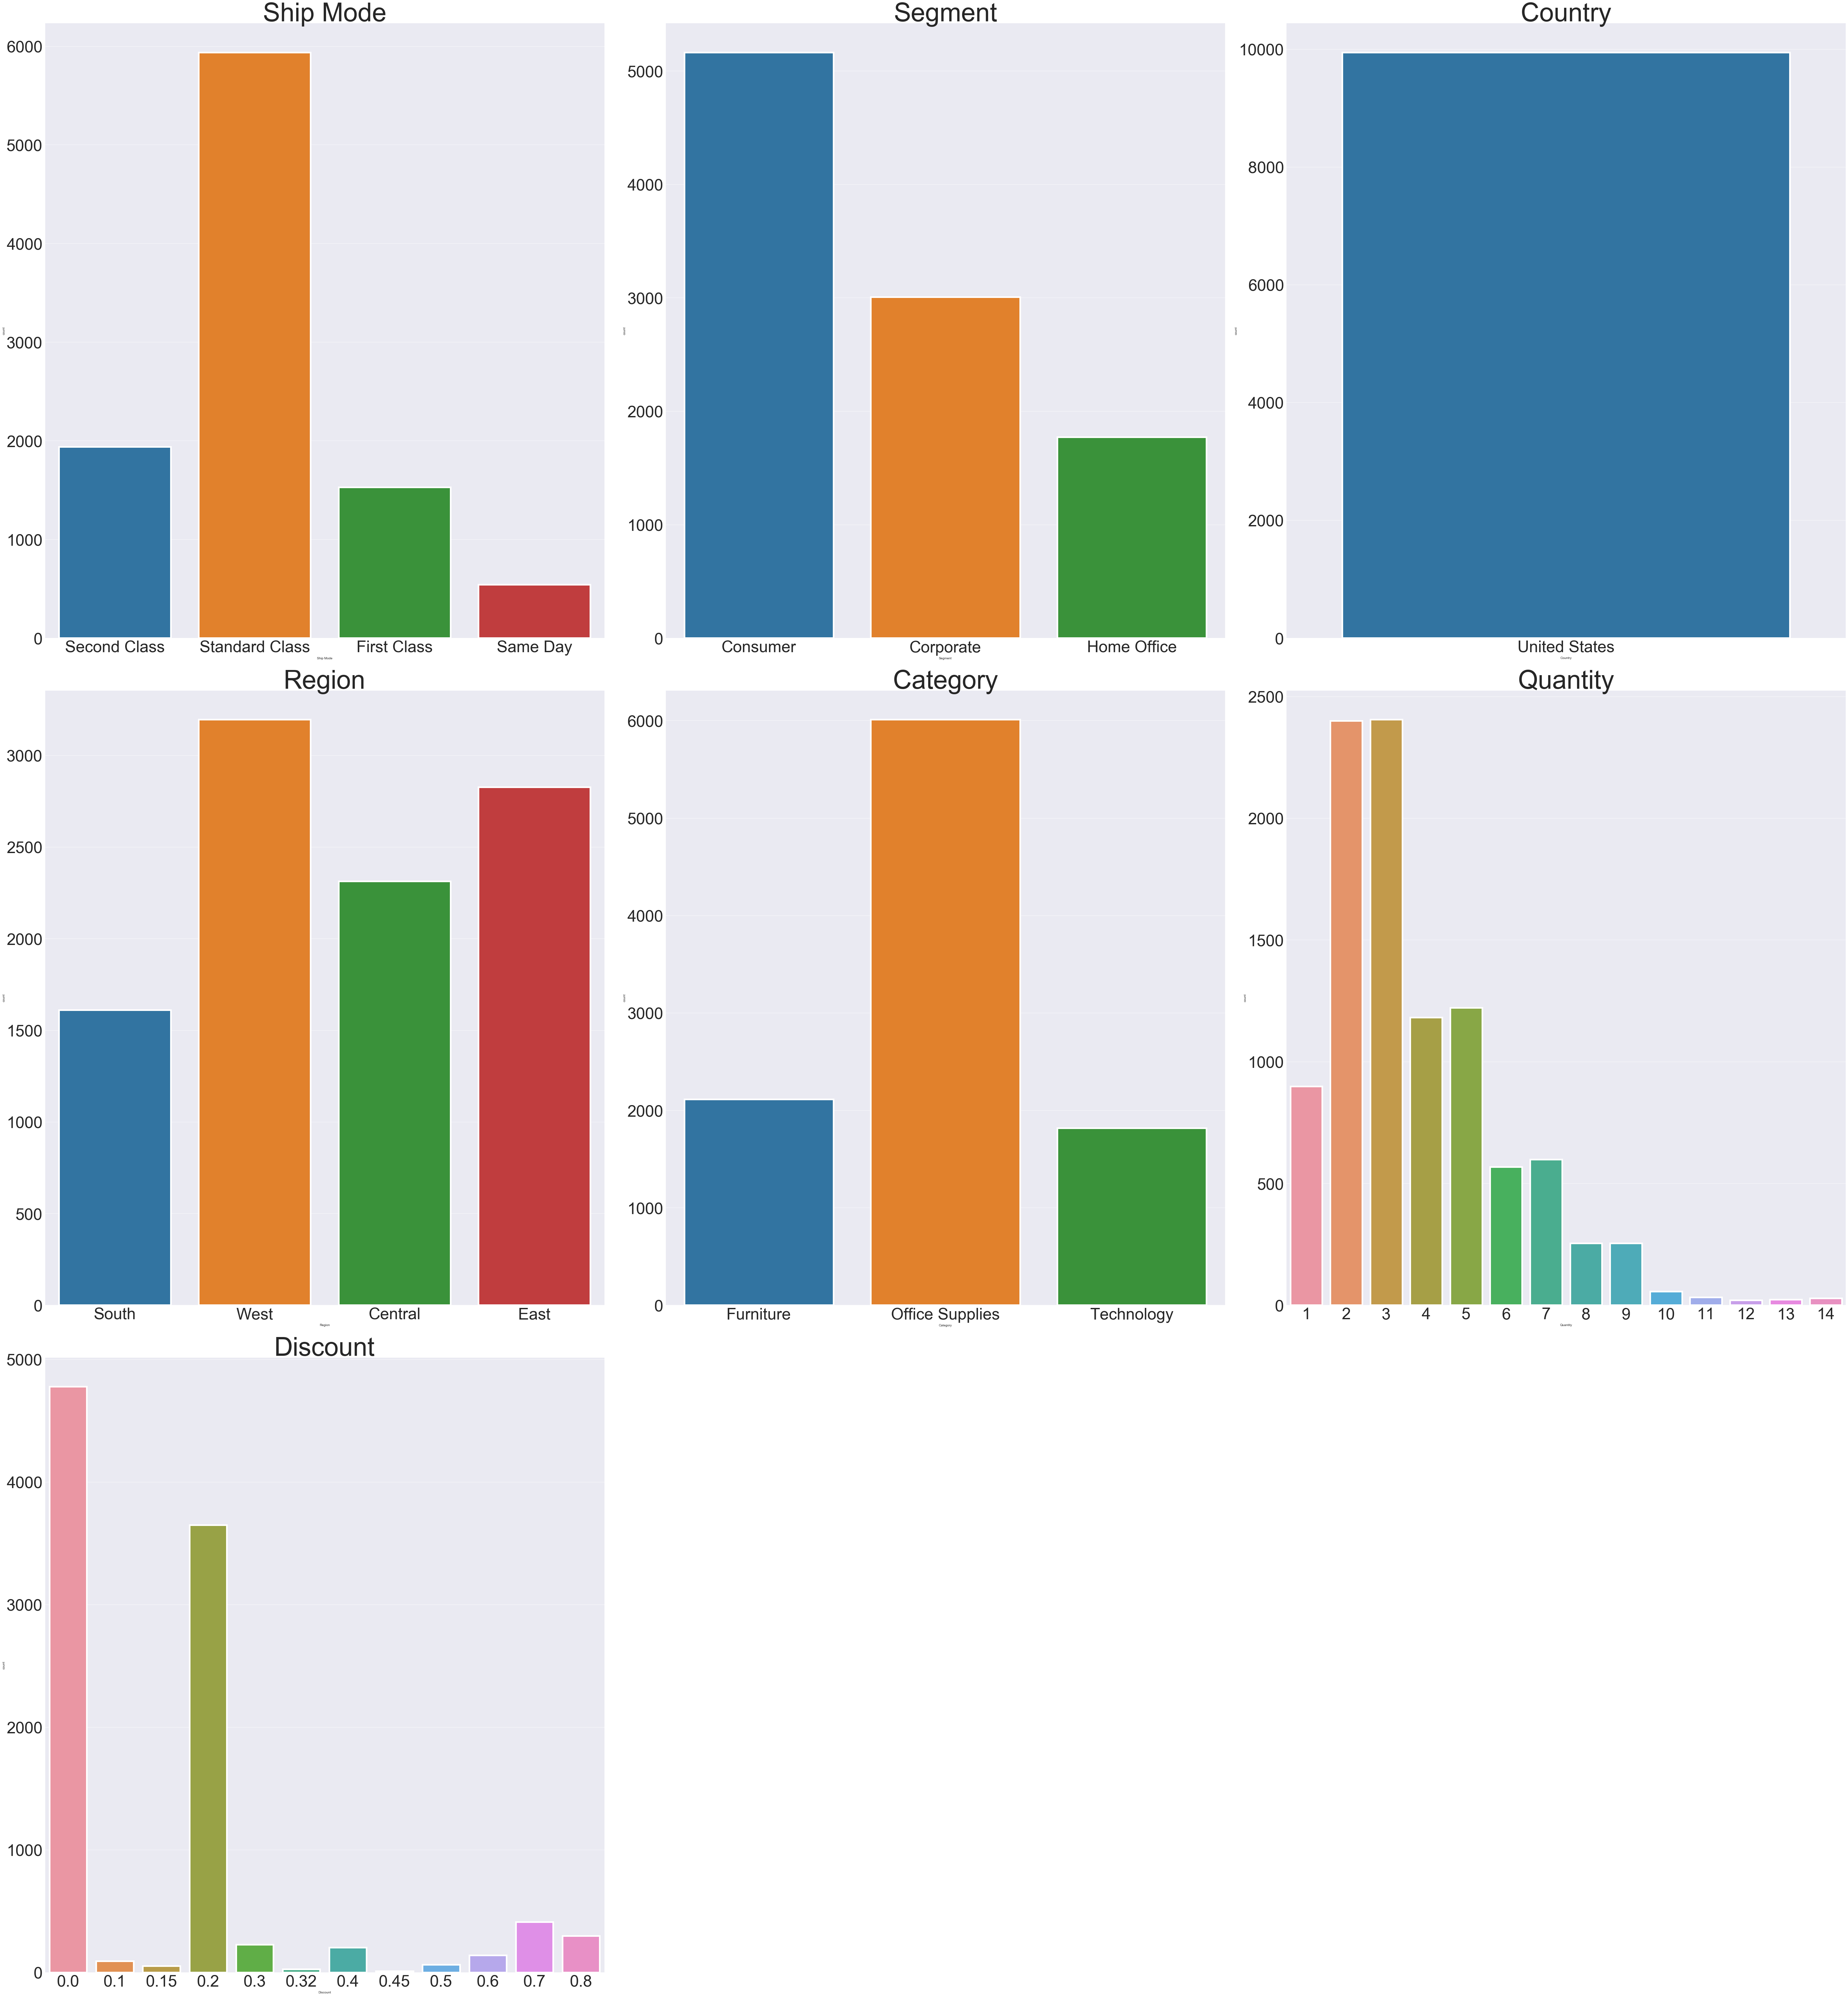

In [204]:
sns.set_style('darkgrid')
def countplot(df,max_columns,val,figsize,title_size=20,title=""):
    l=len(df.columns)
    ligns=ceil(l/max_columns)
    fig=plt.figure(1,figsize=figsize)
    i=1
    
    for col in df.columns:
        if len(pd.unique(df[col]))<val:
            plt.subplot(ligns,max_columns,i)
            plt.title(col, fontsize=title_size)
            i=i+1
            p=sns.countplot(data = df, x=col,linewidth=5)
            #to increase y ticks size
            plt.yticks(size=50)
            #to increase x ticks 
            plt.xticks(size=50)
            
    fig.tight_layout(pad=3.0)
    
    fig.suptitle(title)
    plt.show()
    
title="Different Countplots"
countplot(df,3,15,(80,200),80)
#countsplot dataframe,columns spliting,max_uniquevalues,figsize,title,title_size

**we can see that the dataset is only located in the US ; we can confirm with pandas.unique also :**

In [205]:
df['Country'].unique()

array(['United States'], dtype=object)

**we can drop this columns because it is not needed**

In [206]:
df=df.drop(['Country'],axis=1)

**we can see there are too many states and city to be ploted**

In [207]:
print(len(df['State'].unique()))
df['State'].unique()

49


array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [208]:
len(df['City'].unique())
df['City'].unique();

## Mean and median profit deviations by category <a class="anchor" id="deviations"></a>

**we can now visualize mean or median deviations of sales for each category**

### Mean deviations

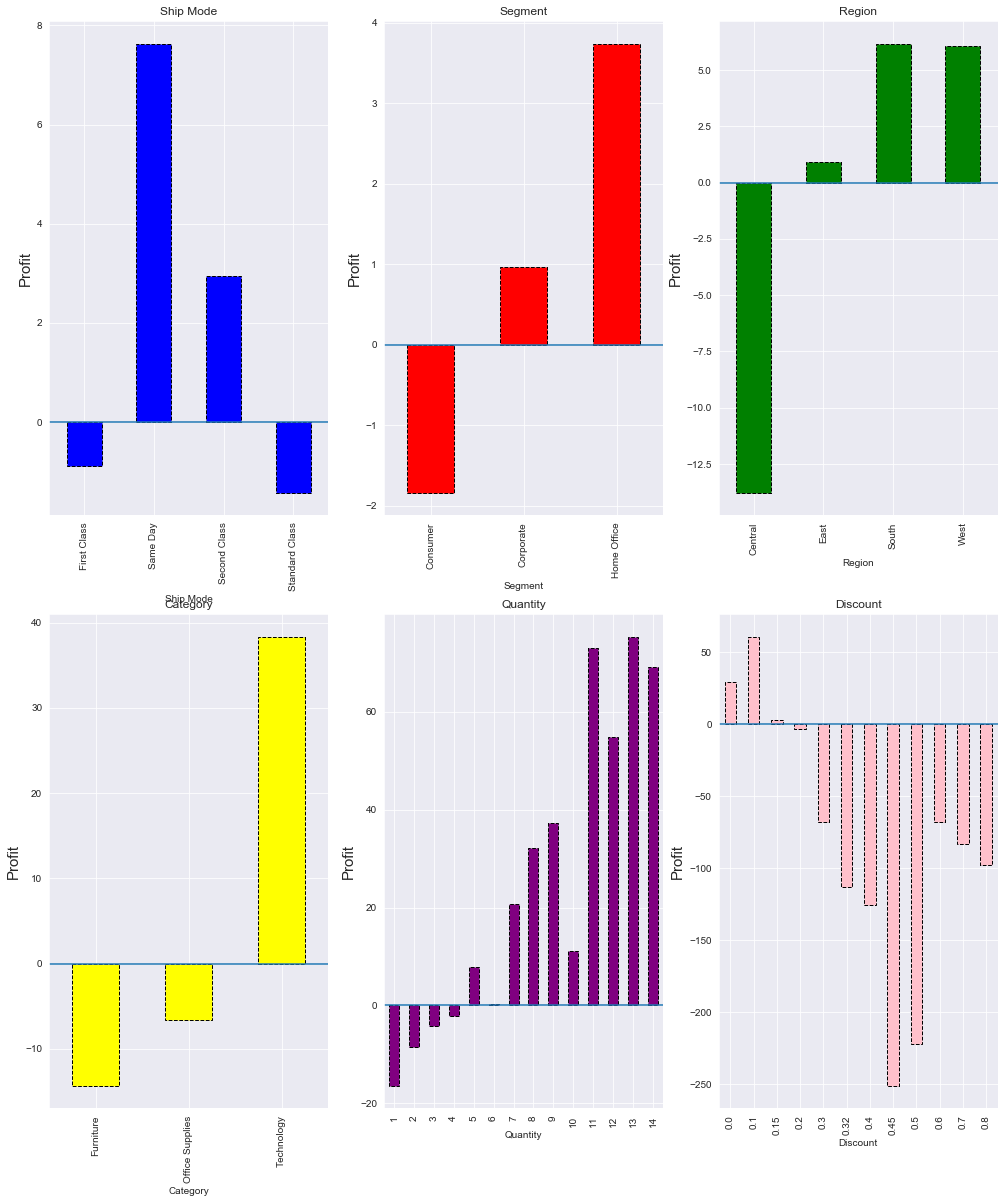

In [209]:
from math import ceil
def mean_dev(dataframe,target,maxcol,cols,palette,size):
    moy=df[target].mean()
    fig=plt.figure(figsize=size)
    l=len(cols)
    ligns=ceil(l/maxcol)
    i=1
    for item in cols:
        plt.subplot(ligns,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].mean()-moy).plot(kind='bar',color=palette[i-1],ls='dashed',edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    plt.show()
    fig.tight_layout(pad=10.0)
mean_dev(df,'Profit',3,['Ship Mode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(17,20))

## ANOVA testing <a class='anchor' id='pval'></a>

we're going to use the anova test dependencies  between our categorical variables and the Profit target 

In [210]:
from scipy.stats import ttest_1samp
import statsmodels.api as sm
from statsmodels.formula.api import ols

Null Hypothesis(Ho): There is no significant difference between the profits made from different categories of a feature.
Alternative Hypothesis(H1): There exists a difference between the profits made from different categories of a feature.

Level of Significance(alpha): 5%

Rejection criteria: If p-value<alpha, then we reject the null hypothesis.

In [211]:
cols=['Segment','Region','Category','Quantity','Discount']

for item in cols:
    model=ols('Profit ~ {}'.format(item),data=df).fit()
    anova_result=sm.stats.anova_lm(model,typ=2)
    print(anova_result)
    print()

                sum_sq      df         F    PR(>F)
Segment   4.511197e+04     2.0  1.628706  0.196236
Residual  1.376731e+08  9941.0       NaN       NaN

                sum_sq      df          F        PR(>F)
Region    6.207580e+05     3.0  15.002309  9.680668e-10
Residual  1.370974e+08  9940.0        NaN           NaN

                sum_sq      df           F        PR(>F)
Category  3.368546e+06     2.0  124.625262  3.494054e-54
Residual  1.343496e+08  9941.0         NaN           NaN

                sum_sq      df           F        PR(>F)
Quantity  1.697308e+06     1.0  124.059163  1.207709e-28
Residual  1.360209e+08  9942.0         NaN           NaN

                sum_sq      df            F         PR(>F)
Discount  1.458866e+07     1.0  1177.950562  4.519268e-244
Residual  1.231295e+08  9942.0          NaN            NaN



### Median deviations

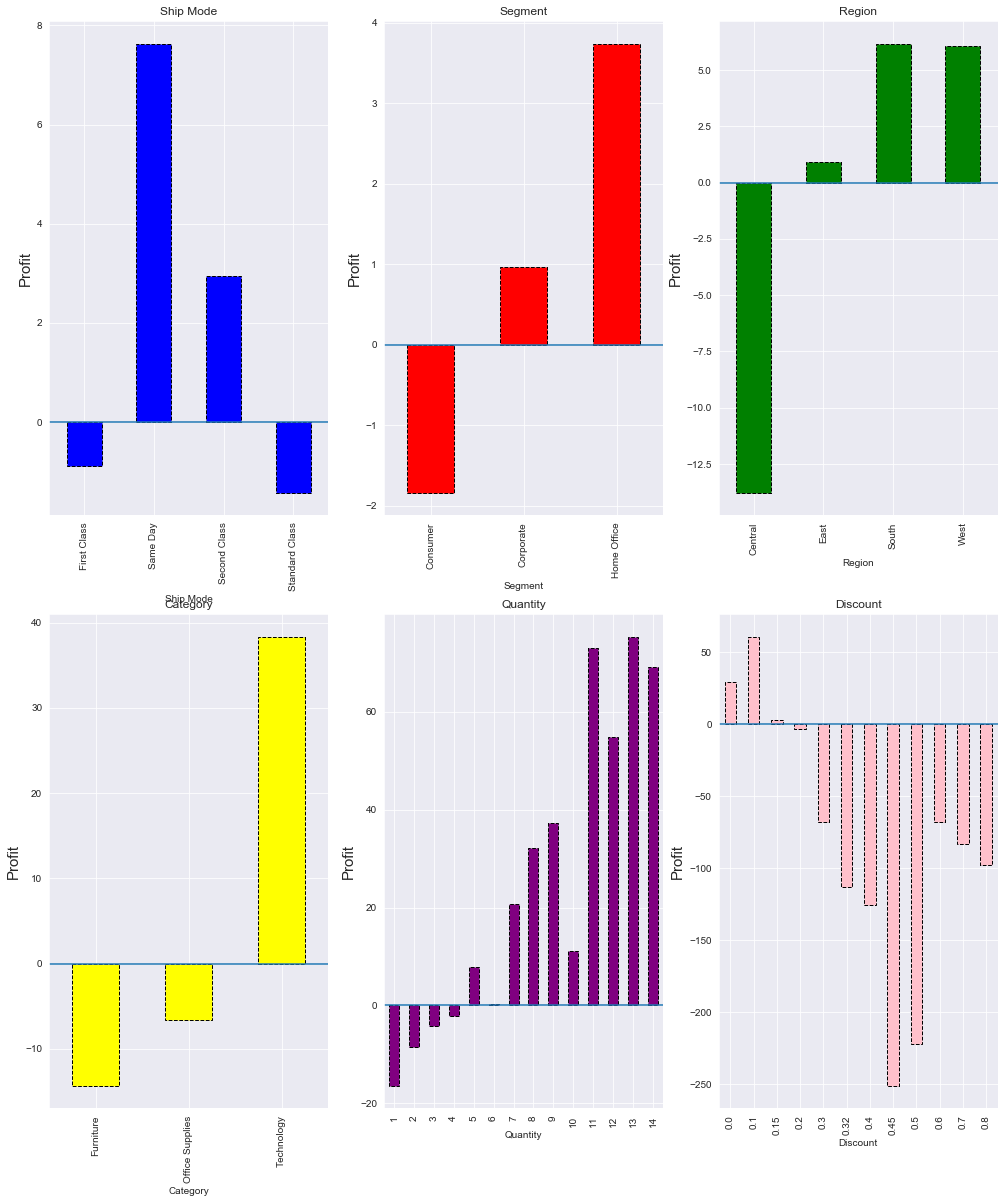

In [212]:
from math import ceil
def median_dev(dataframe,target,maxcol,cols,palette,size):
    moy=df[target].median()
    fig=plt.figure(figsize=size)
    l=len(cols)
    ligns=ceil(l/maxcol)
    i=1
    for item in cols:
        plt.subplot(ligns,maxcol,i)
        plt.title(item)
        (df.groupby(str(item))[str(target)].median()-moy).plot(kind='bar',color=palette[i-1],ls='dashed',edgecolor='Black')
        plt.ylabel(str(target),size=15)
        plt.axhline(y=0)
        i =i+1
    plt.show()
    fig.tight_layout(pad=10.0)
mean_dev(df,'Profit',3,['Ship Mode','Segment','Region','Category','Quantity','Discount'],['Blue','Red','Green','Yellow','Purple','Pink'],(17,20))

### Profit deviations conclusion

**Based on mean deviations and anova testing we can conlude:**

**Quantity** : the median and profitsales evolves increasingly with the quantity of products the buyer gets, one products gets low profit.

**Discount** : according to average and median profit deviations **the higher profit is generated with 10% discount** then is **decreasing** for the **15-50% range** the worst profit is in the 45-55% discount range.


**Category**: according to profit deviations  **technology** products gets higher profit.

**Region**: the deviations from different regions of the US tends to favour the **West side**.

**Segment**: no significative difference.

**Ship mode**: no significative difference.


## Pairplots <a class="anchor" id="pairplots"></a>

**we will try to find some dependencies using pairplots**

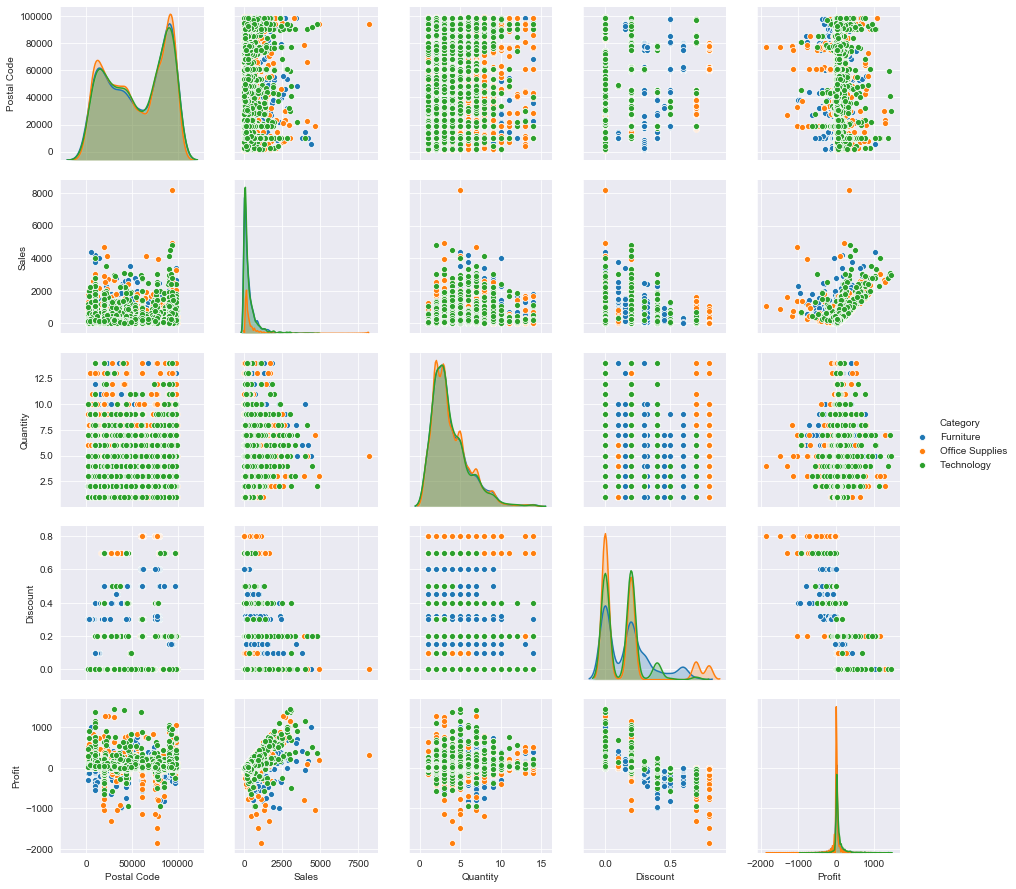

In [213]:
df.drop(['Postal Code'],axis=1)
sns.pairplot(df, hue='Category')

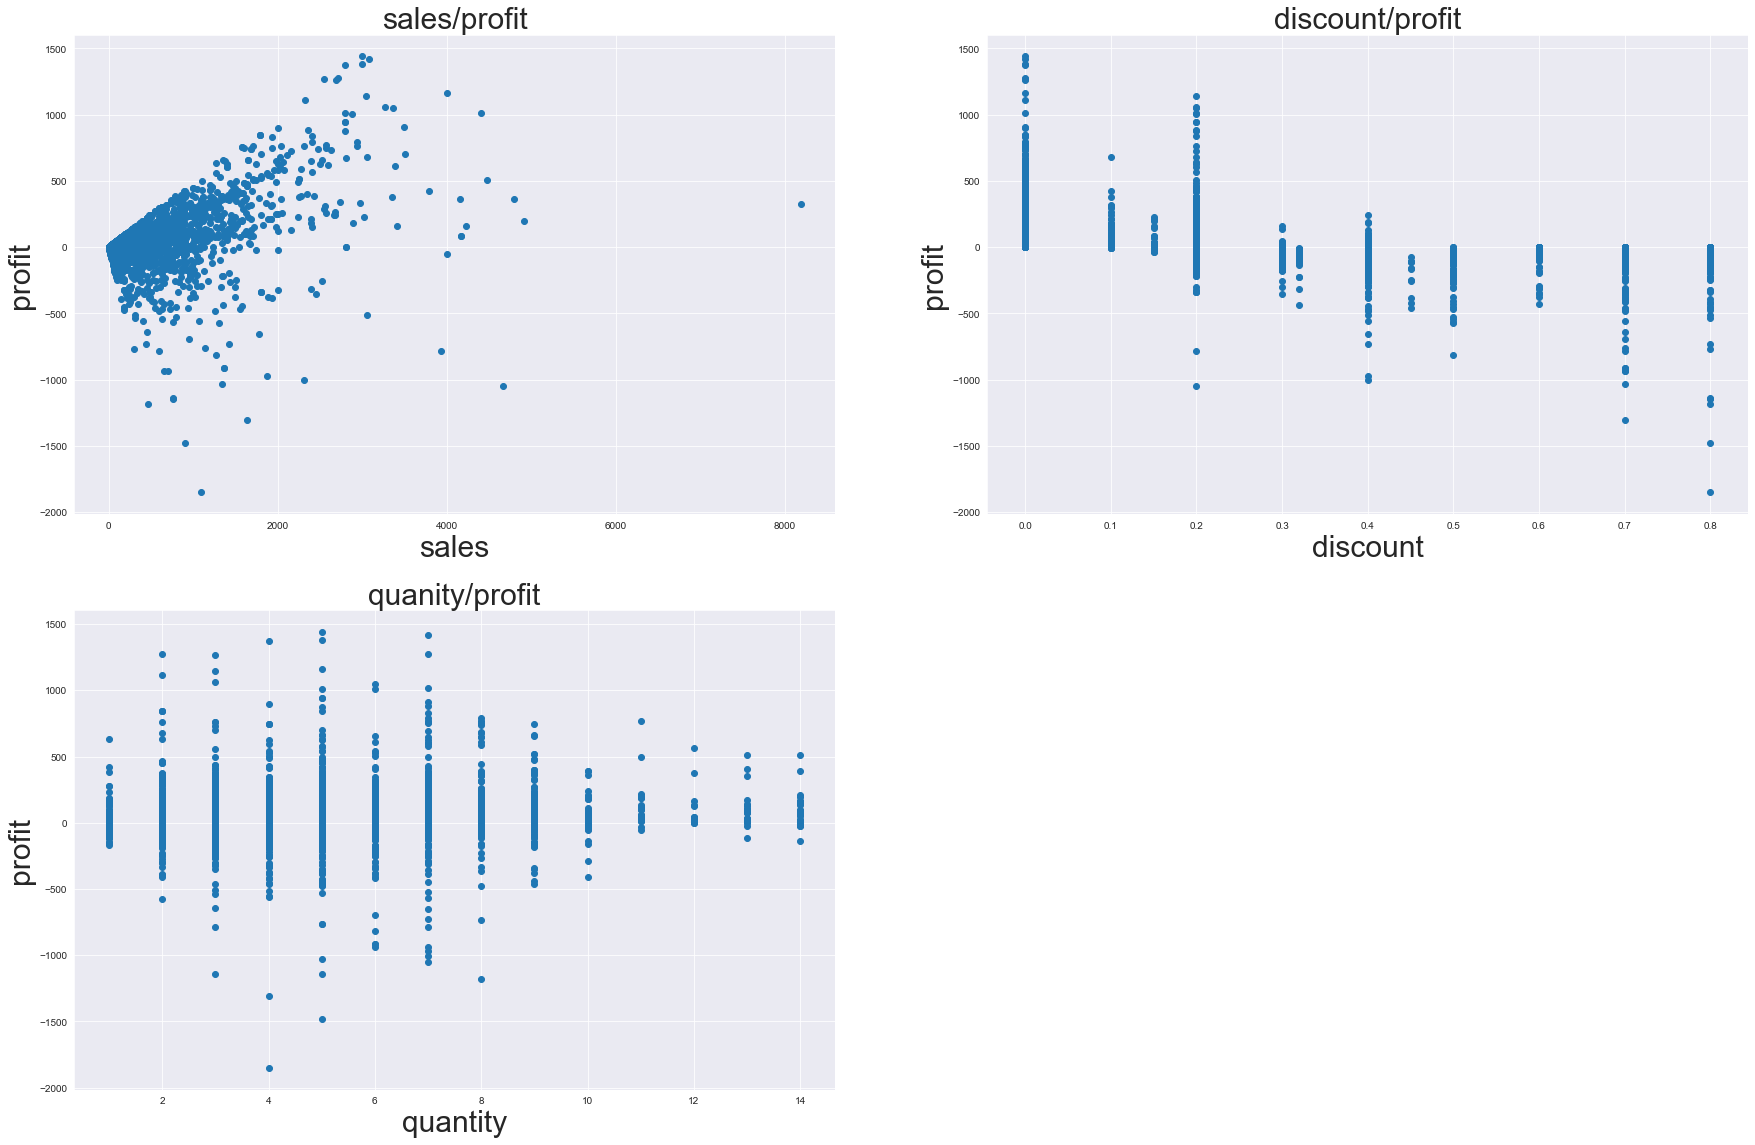

In [214]:
figplots=plt.figure(figsize=(30,30))
plt.subplot(3,2,1)
plt.title("sales/profit",fontsize=30)
plt.xlabel("sales",size=30)
plt.ylabel("profit",size=30)
plt.scatter(df['Sales'],df['Profit'])

plt.subplot(3,2,2)
plt.title("discount/profit",fontsize=30)
plt.xlabel("discount",size=30)
plt.ylabel("profit",size=30)
plt.scatter(df['Discount'],df['Profit'])

plt.subplot(3,2,3)
plt.title("quanity/profit",fontsize=30)
plt.xlabel("quantity",size=30)
plt.ylabel("profit",size=30)
plt.scatter(df['Quantity'],df['Profit'])
plt.show()

**we can see correlations between sales/profit, discount/profit**

**the values of profit seems to spread less with quantity >8 or with 1 item**

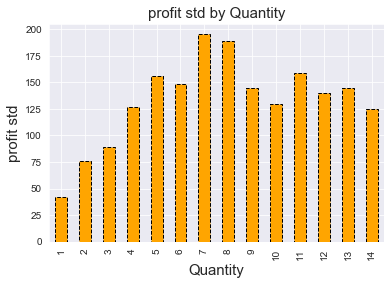

In [215]:
df.groupby('Quantity')['Profit'].std().plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')
plt.title("profit std by Quantity",size=15)
plt.xlabel("Quantity",size=15)
plt.ylabel("profit std",size=15)
plt.show()

**we can say that with low quantity of items or higher than 8 the profit spread less than in the range 5->8**

## Correlation <a class="anchor" id="corr"></a>

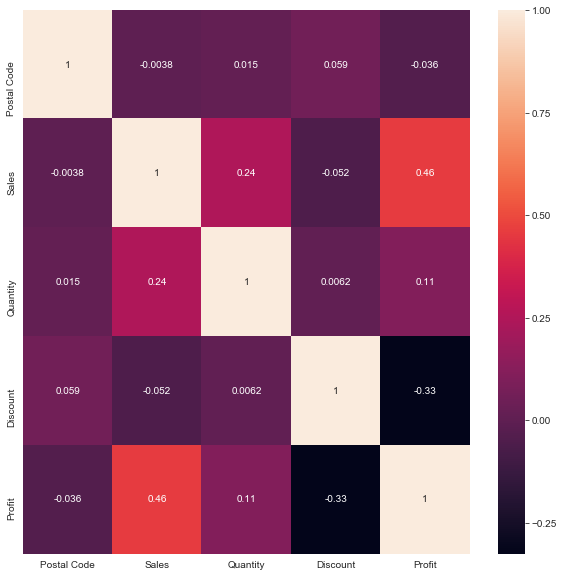

In [216]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

**Obvisouly sales are higly correlated with profit, profit with quantity and discount, postal code isn't important**

## Grouping <a class="anchor" id="group"></a>

In [217]:
from sklearn.cluster import KMeans

## Elbow method

In [218]:
inertia=[]
k_range=range(1,20)
for K in k_range:
    model=KMeans(n_clusters=K).fit(pd.get_dummies(df[['Category','Region','Profit']]))
    inertia.append(model.inertia_)

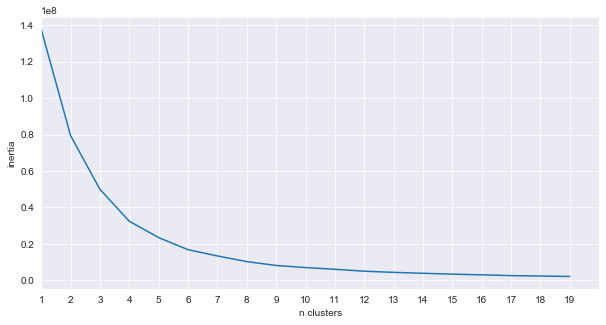

In [219]:
elbow=plt.figure(figsize=(10,5))
plt.plot(k_range,inertia)
plt.xlim([1,20])
plt.xticks(np.arange(1,20,step=1))
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.show()


**we can see we have an elbow at 3 cluster**

In [220]:
model = KMeans(n_clusters=3)
model.fit(pd.get_dummies(df[['Category','Region','Profit']]))

Klusters=model.predict(pd.get_dummies(df[['Category','Region','Profit']]))

In [221]:
print(Klusters)
#print(model.cluster_centers_)

[0 0 0 ... 0 0 0]


In [222]:
centroids=model.cluster_centers_
filtered_data0=pd.get_dummies(df[['Category','Region','Profit']])[Klusters==0]

filtered_data1=pd.get_dummies(df[['Category','Region','Profit']])[Klusters==1]

filtered_data2=pd.get_dummies(df[['Category','Region','Profit']])[Klusters==2]

In [223]:
filtered_data0.describe()


,Profit,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
count,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000
mean,17.194062,0.207860,0.616435,0.175704,0.232451,0.282261,0.161307,0.323981
std,48.586556,0.405798,0.486279,0.380588,0.422417,0.450124,0.367833,0.468017
min,-231.411600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.763200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.215600,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.697200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,233.996100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [224]:
filtered_data1.describe()

,Profit,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,452.339397,0.249191,0.343042,0.407767,0.194175,0.330097,0.181230,0.294498
std,240.344229,0.433246,0.475495,0.492217,0.396206,0.471011,0.385833,0.456556
min,235.952400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,294.548800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,361.299400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,539.246400,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1439.976000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [225]:
filtered_data2.describe()

,Profit,Category_Furniture,Category_Office Supplies,Category_Technology,Region_Central,Region_East,Region_South,Region_West
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,-483.630453,0.495798,0.327731,0.176471,0.344538,0.319328,0.159664,0.176471
std,286.276988,0.502096,0.471371,0.382832,0.477227,0.468188,0.367843,0.382832
min,-1850.946400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-529.686500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-383.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-301.727500,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,-240.784000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [226]:
print(centroids[0])
print()
print(centroids[1])
print()
print(centroids[2])

[17.19406198  0.20786045  0.61643548  0.17570408  0.23245061  0.28226145
  0.16130727  0.32398066]

[4.52339397e+02 2.49190939e-01 3.43042071e-01 4.07766990e-01
 1.94174757e-01 3.30097087e-01 1.81229773e-01 2.94498382e-01]

[-4.83630453e+02  4.95798319e-01  3.27731092e-01  1.76470588e-01
  3.44537815e-01  3.19327731e-01  1.59663866e-01  1.76470588e-01]


## Top 10 states in sales  and profit <a class="anchor" id="topstates"></a>

### Total value sales

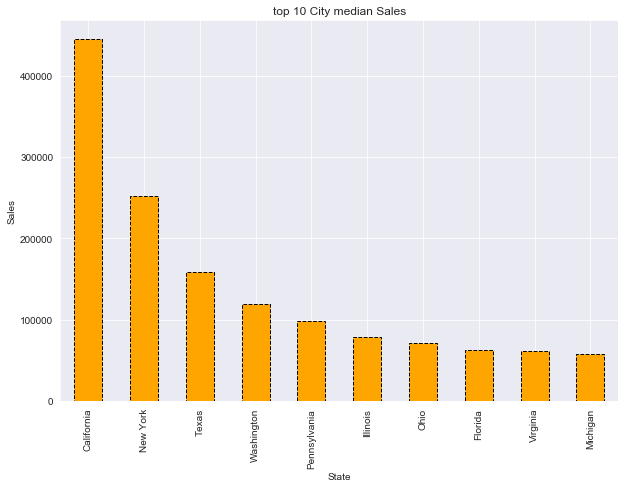

In [227]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('State')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

### Total value profit

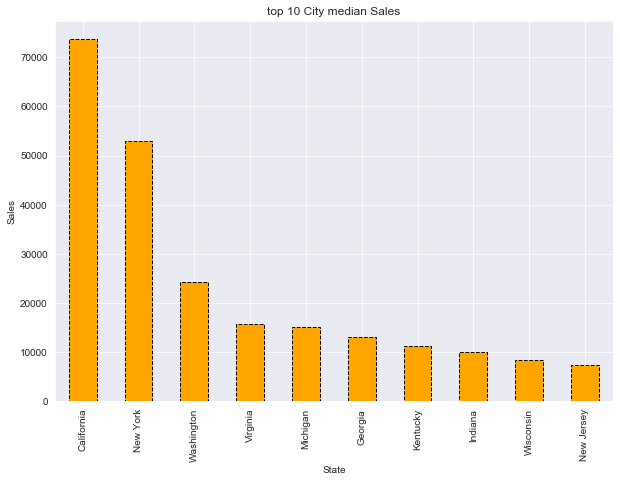

In [228]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('State')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

## Top 10  city in sales and profit <a class="anchor" id="topcity"></a>

### Total sales

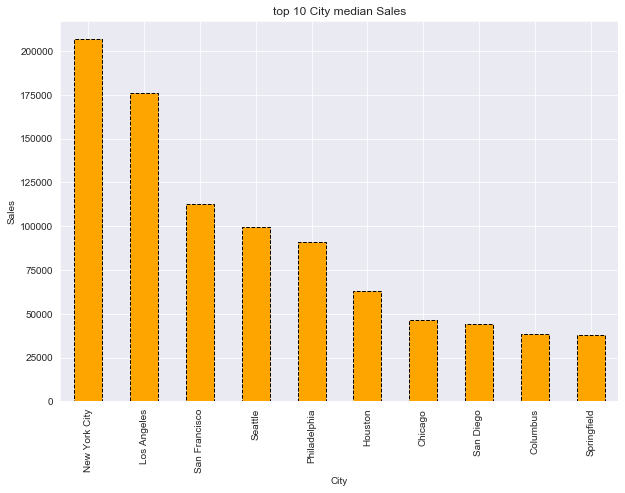

In [229]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('City')['Sales'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

### Total profit

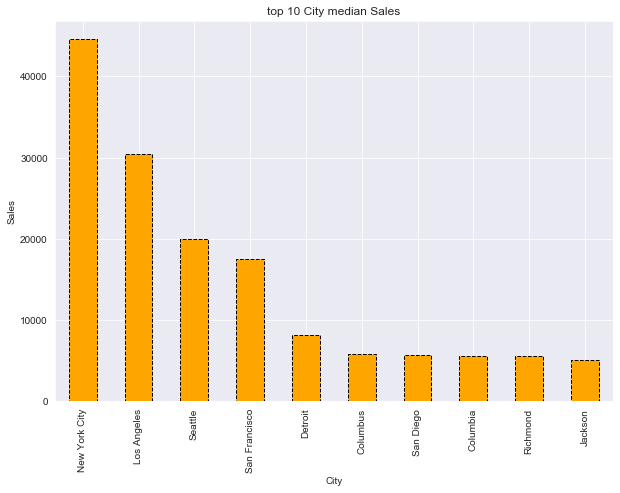

In [230]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('City')['Profit'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

## Conlusion of best states/cities  <a class="anchor" id="topconclusion"></a>

**The state of the california  and  New-york city has the biggest total values sales and profit, we can't conclude one commercial activity will have a better profit in New-York City because the data isn't equally reparted but it means the State of California and New-York City have a big commercial activity**




## Best sub-category <a class="anchor" id="subcat"></a>

### Mean

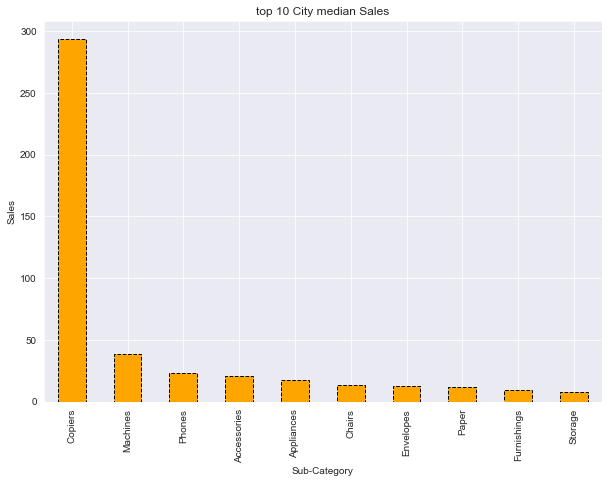

In [231]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('Sub-Category')['Profit'].median().sort_values(ascending=False)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

**checking cardinality of copiers products**

In [232]:
df[df['Sub-Category']=='Copiers'].shape

(60, 19)

**59 values is significant**

### Worst sub categories

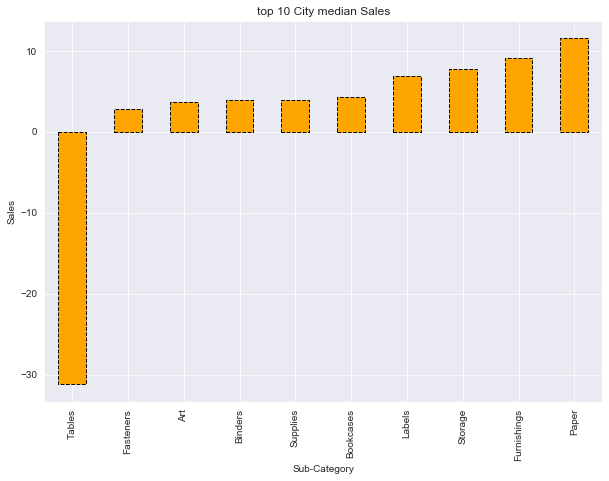

In [233]:
top10s=plt.figure(figsize=(10,7))
plt.title('top 10 City median Sales')
plt.xlabel('State')
plt.ylabel('Sales')
df.groupby('Sub-Category')['Profit'].median().sort_values(ascending=True)[0:10].plot(kind='bar',color='Orange',ls='dashed',edgecolor='Black')

## Data visualization conclusion <a class="anchor" id="edaconcl"></a>

**Region,State,City** 

The californian State have a huge commercial activity, it represent the main activity of the west side, in the other hand New-York have huge total sales and profit values.

**Factors of profit:**

**Quantity** : the median and profitsales evolves increasingly with the quantity of product the buyer gets, one products gets low profit.

**Discount** : according to average and median profit deviations **the higher profit is generated with 10% discount** then is **decreasing** for the **15-50% range** the **worst** profit is in the **45-55%** discount range.


**Category**: according to profit deviations  **technology** products gets higher profit. **Office supplies and furnitures** tends to generate **less** profit

**Sub-Category**: we can see that **copiers**,**accessories** or **phones** generates a lot of profit, **Tables** is the worst sub-category followed by **fasteners**.

**Segment**: no significant changes

**Ship mode**: no significant changes